
# Week 8 - High Frequency Words

**Trishita Nath**

## Project Overview

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora."



In [98]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
%matplotlib inline
#nltk.download('gutenberg')

## Corpus of interest
I will use the gutenberg corpus 


In [99]:
nltk.download('gutenberg') 

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [100]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

I will analyze the caroll alice corpus

In [101]:
my_corpus = nltk.corpus.gutenberg.words("austen-emma.txt")
my_corpus

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

## Total unique words in the corpus

<u>Total Words</u>

In [102]:
# Actual words in the corpus - removing punctuation and numbers
corpus_words = [word.upper() for word in my_corpus if word.isalpha()]
total_corpus_words = len(corpus_words)
total_corpus_words

161600

<u>Total Unique Words</u>

In [103]:
# Count of unique words that consist of alphabet
len(set(word.upper() for word in my_corpus if word.isalpha()))

7079

<u>Frequency distribution of words by length</u>

In [104]:
word_lengths = [len(word) for word in my_corpus if word.isalpha()]
word_len_dist = nltk.FreqDist(word_lengths)
{key:value for key,value in sorted(word_len_dist.items(),reverse=False)}

{1: 7317,
 2: 30785,
 3: 37795,
 4: 30650,
 5: 16804,
 6: 11593,
 7: 9967,
 8: 5856,
 9: 5389,
 10: 2742,
 11: 1353,
 12: 792,
 13: 409,
 14: 97,
 15: 38,
 16: 6,
 17: 7}

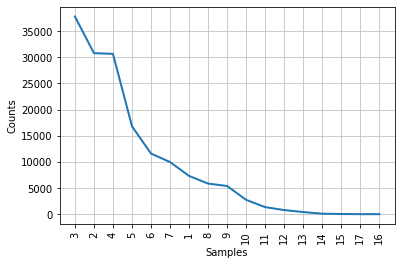

In [105]:
# Plot
word_len_dist.plot()

Most words in the corpus are made up of 2 to 4 characters.

## Unique Words that represent half of the total words in the corpus

In [106]:
all_words_list = [word for word in my_corpus if word.isalpha()]
mst_cmn_words = nltk.FreqDist(all_words_list)
#print(mst_cmn_words)

common_words_df = pd.DataFrame(mst_cmn_words.most_common(100)) # 100 most common words
common_words_df.columns = ['Word','Count']
print(common_words_df.head(100))

       Word  Count
0        to   5183
1       the   4844
2       and   4672
3        of   4279
4         I   3178
..      ...    ...
95      who    281
96  herself    279
97      now    273
98     time    272
99      can    270

[100 rows x 2 columns]


In [107]:
# Cumulative frequencies
common_words_df['Cumulative_Count'] = np.cumsum(common_words_df['Count'])

common_half = (common_words_df['Cumulative_Count'] >= (total_corpus_words / 2)).idxmax()
print("Most common words that make up half of the total words in the corpus = {}".format(common_half))

Most common words that make up half of the total words in the corpus = 65


## 200 High Frequency Words in the Corpus

In [108]:
# 200 Highest Frequency words in the corpus
high_freq_200 = mst_cmn_words.most_common(200)
high_freq_200

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301),
 ('is', 1220),
 ('with', 1187),
 ('Mr', 1153),
 ('very', 1151),
 ('but', 1148),
 ('his', 1088),
 ('at', 997),
 ('s', 933),
 ('so', 924),
 ('Emma', 865),
 ('all', 835),
 ('could', 825),
 ('would', 815),
 ('been', 759),
 ('him', 758),
 ('Mrs', 699),
 ('on', 677),
 ('any', 651),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 591),
 ('do', 580),
 ('must', 564),
 ('me', 564),
 ('She', 562),
 ('will', 559),
 ('by', 558),
 ('which', 552),
 ('from', 535),
 ('Harriet', 506),
 ('or', 490),
 ('said', 484),
 ('much', 478),
 ('more', 464),
 ('an', 452),
 ('are', 447),
 ('He', 441),
 ('such', 440),
 ('Weston', 439),
 ('what', 434),
 ('them', 432),
 ('am', 422),
 ('there', 420),
 ('this',

Graph of the Relative frequency of the 200 words

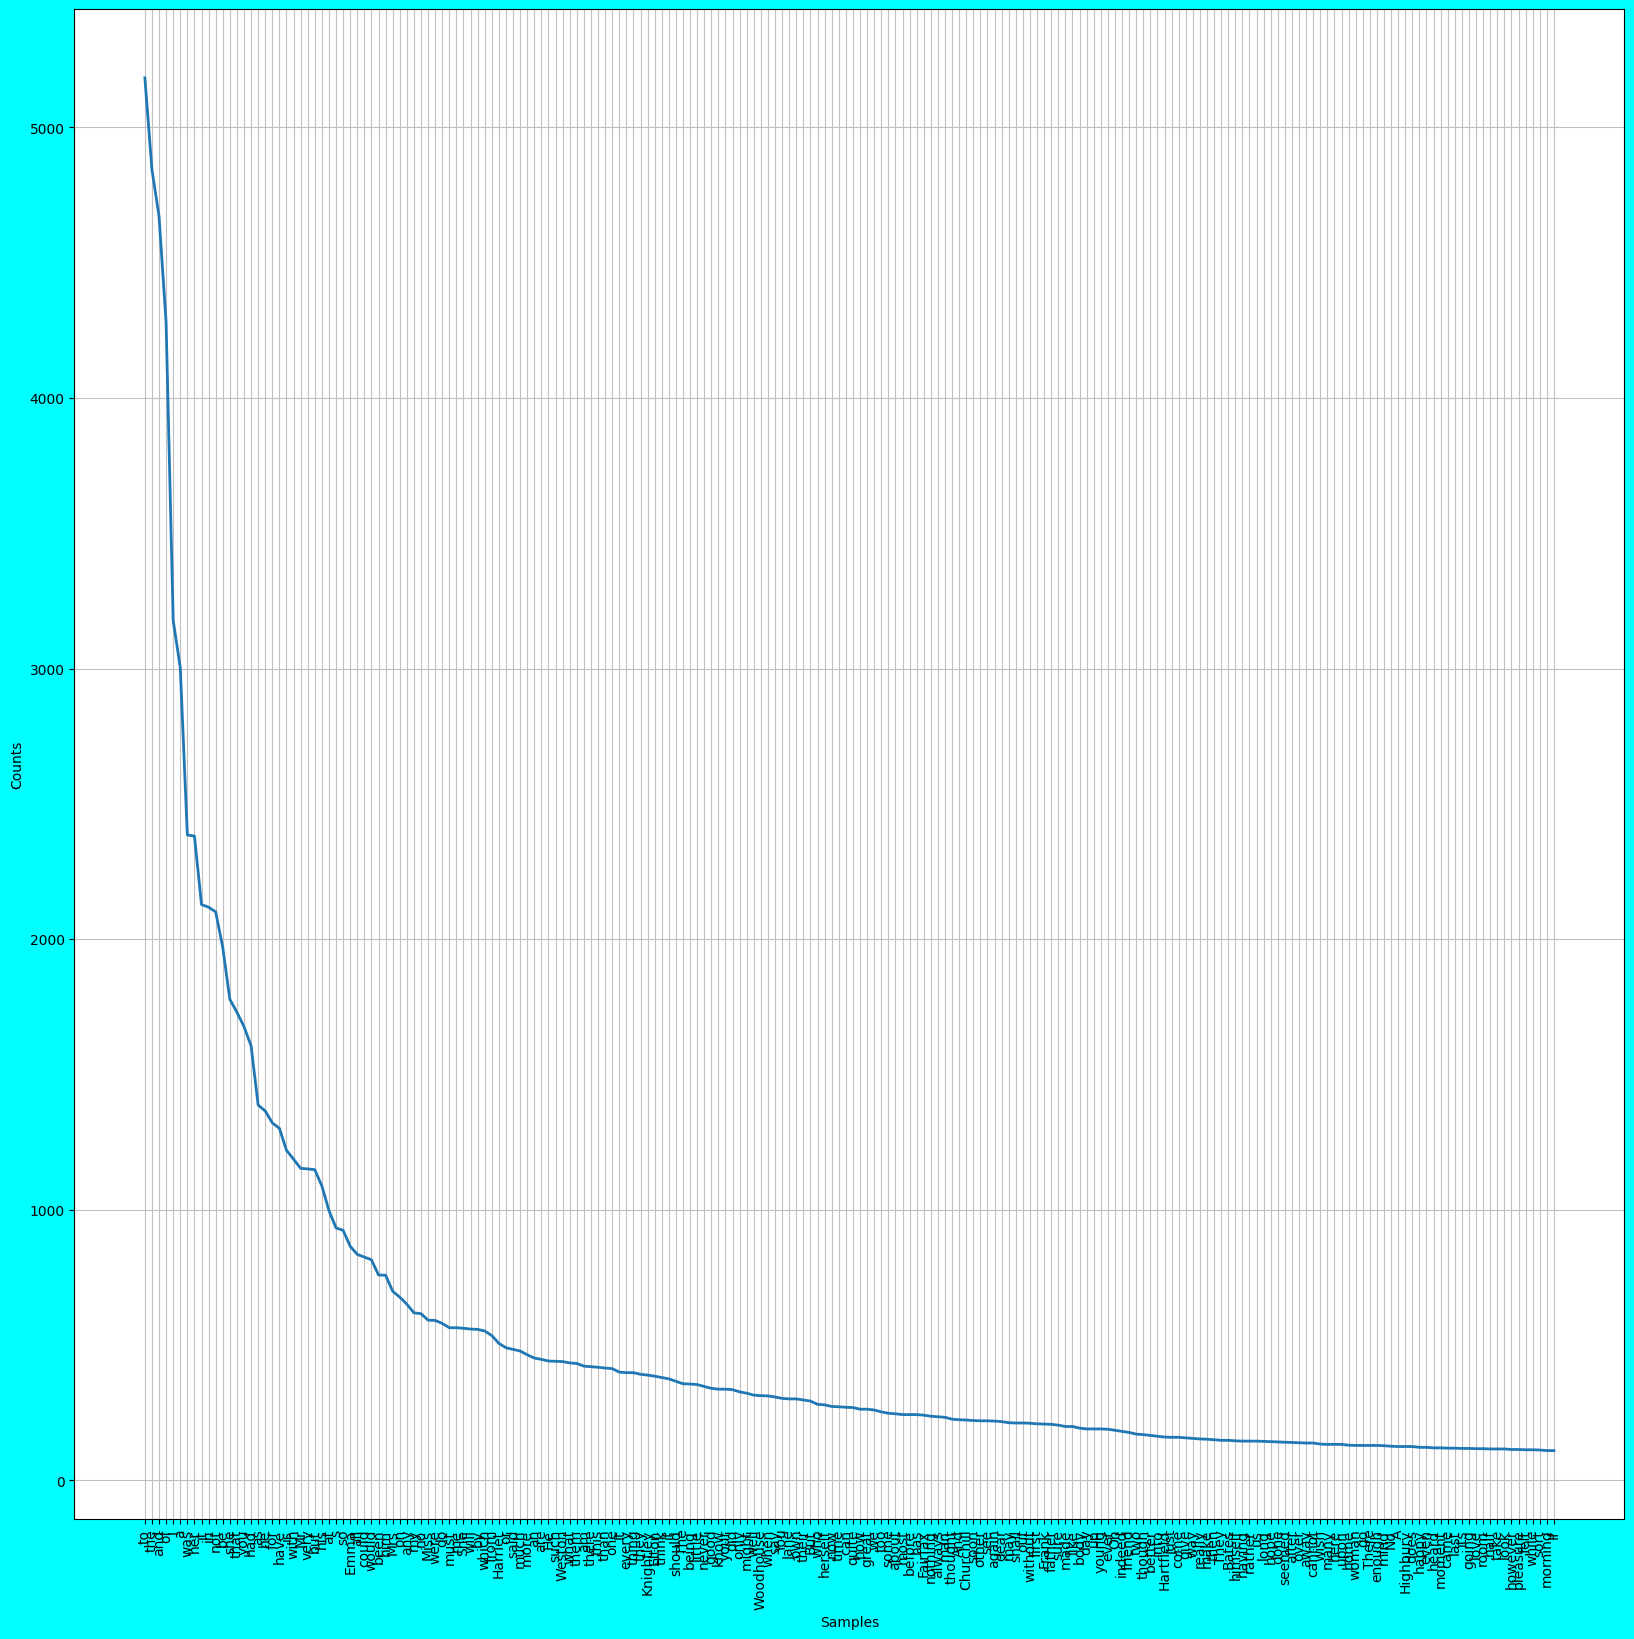

In [109]:
fg = plt.figure(figsize=(20,20), dpi=100, facecolor='cyan', edgecolor='lime')
mst_cmn_words.plot(200, cumulative=False)

## Zipf's Law

The distribution follows Zipf's law; few words being used many times and many words being used rarely. However, the requirement of frequency of any word being inversely proportional to its rank in the frequency table does not hold for the most of common words.

## Comparison with "all words in all corpora."

The top word in this corpus is *the* which, in all corpora, is usuall also the most common word. Also, feminine words like *her* out-number masculine words like *he*. This is most likely due to the fact that the autjor is a female describing her thoughts.